In [1]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

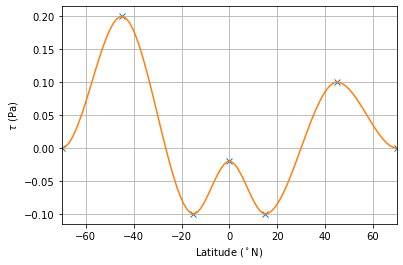

In [2]:
def scurve(x, x0, dx):
    """Returns 0 for x<x0 or x>x+dx, and a cubic in between."""
    s = numpy.minimum(1, numpy.maximum(0, (x-x0)/dx))
    return (3 - 2*s)*( s*s )
def itau(ytau,taud,ys):
    """Returns a profile tau(ys) that uses s-curves between node,valuesa ytau,taud"""
    taus = 0.*ys
    ks = 0
    for i in range(len(ys)):
        y = ys[i]
        if y>=ytau[ks+1]:
            ks=min(len(ytau)-2,ks+1)
        taus[i] = taud[ks] + ( taud[ks+1] - taud[ks]) * scurve(y, ytau[ks], ytau[ks+1]-ytau[ks])
    return taus
ytau,taud = [-70,-45,-15,0,15,45,70], [0,.2,-0.1,-.02,-.1,.1,0]
ys = numpy.linspace(-70,70,100)
tau = itau(ytau, taud, ys)
plt.plot(ytau,taud,'x')
plt.plot(ys, tau)
plt.xlim(-70,70);
plt.xlabel('Latitude ($^\circ$N)');
plt.ylabel(r'$\tau$ (Pa)');
plt.grid();